In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Test_file.csv", sep=',')
links=df.movie_imdb_link.isna()
skip=[]
for i in range(len(links)):
    if links[i]==True :
        skip.append(i)
df=df.drop(index=skip)
df.head()

,id,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,2661,Color,Phil Traill,128.0,99.0,3.0,628.0,Katy Mixon,14000.0,33860010.0,...,143.0,English,USA,PG-13,1.500000e+07,2009.0,982.0,NaN,1.85,0
1,3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,NaN,2.35,607
2,1293,Color,J.A. Bayona,371.0,114.0,171.0,284.0,Geraldine Chaplin,6000.0,18996755.0,...,322.0,English,Spain,PG-13,4.500000e+07,2012.0,382.0,NaN,2.35,54000
3,3061,Color,Daisy von Scherler Mayer,70.0,94.0,18.0,183.0,Dash Mihok,658.0,3034181.0,...,128.0,English,UK,R,1.100000e+07,2002.0,463.0,NaN,1.85,550
4,2312,Color,Michael Apted,116.0,116.0,150.0,956.0,Abigail Spencer,18000.0,6002756.0,...,75.0,English,USA,PG,2.000000e+07,2012.0,1000.0,NaN,1.85,13000


In [3]:
#df=df.drop('id',1)
df.columns

Index(['id', 'color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [4]:
df.shape

(417, 29)

In [5]:
#Affiche le nombre de valeurs manquantes et les pourcentages
x=df.isna().sum()
y=df.isna().sum()*100/len(df)
result = pd.concat([x, y], axis=1)
result.columns=["nombre de données manquantes","pourcentage de données manquantes"]
result

,nombre de données manquantes,pourcentage de données manquantes
id,0,0.000000
color,0,0.000000
director_name,6,1.438849
num_critic_for_reviews,2,0.479616
duration,0,0.000000
director_facebook_likes,6,1.438849
actor_3_facebook_likes,3,0.719424
actor_2_name,2,0.479616
actor_1_facebook_likes,2,0.479616
gross,69,16.546763


<AxesSubplot:>

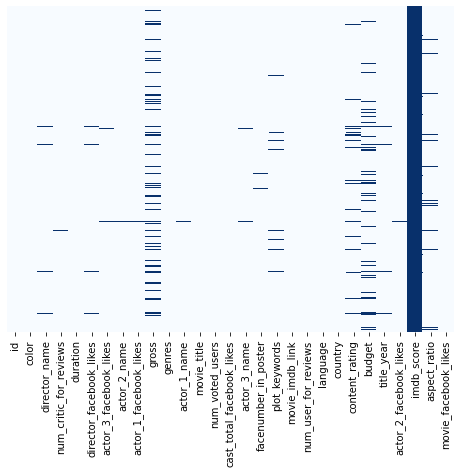

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),cmap='Blues',cbar=False,yticklabels=False)

In [7]:
df['color']=df['color'].fillna(0)   
df['color'] = df['color'].astype('category').cat.codes

In [8]:
df['genres_first'] = df.genres.apply(lambda x: x.split('|')[0] if '|' in x else x)
df['nombre_genres'] = df.genres.apply(lambda x: len(x.split('|')))

In [9]:
df=df.drop(columns=['num_user_for_reviews','cast_total_facebook_likes','num_critic_for_reviews'])
#drop une des deux varaibles si correlation >0.6

In [10]:
from collections import Counter
def most_common(df,colonne,x_most_common):
    df[colonne]=df[colonne].apply(lambda x:str(x).split('|'))
    flat_list=[item for sublist in list(df[colonne]) for item in sublist if item != "nan"]
    a=list(dict(Counter(flat_list).most_common(x_most_common)).keys())
    df[colonne]=df[colonne].apply(lambda x: len(set(x).intersection(set(a)))) 
    return df

In [11]:
df=most_common(df,'plot_keywords',50)
df=most_common(df,'content_rating',3)
df=most_common(df,'language',2)
df=most_common(df,'country',3)

In [12]:
df.columns

Index(['id', 'color', 'director_name', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'language', 'country', 'content_rating', 'budget',
       'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'genres_first', 'nombre_genres'],
      dtype='object')

In [13]:
#On a test pour chaque variable chaque quantile et on garde le quantile avec le meilleur score 

df['duration']=df['duration'].fillna(df['duration'].quantile(0.7))
df['actor_3_facebook_likes']=df['actor_3_facebook_likes'].fillna(df['actor_3_facebook_likes'].quantile(0.5))
df['actor_1_facebook_likes']=df['actor_1_facebook_likes'].fillna(df['actor_1_facebook_likes'].quantile(0.6))
df['gross']=df['gross'].fillna(df['gross'].quantile(0.3))
df['budget']=df['budget'].fillna(df['budget'].quantile(0.3))
df['title_year']=df['title_year'].fillna(df['title_year'].quantile(0.5))
df['actor_2_facebook_likes']=df['actor_2_facebook_likes'].fillna(df['actor_2_facebook_likes'].quantile(0.2))
df=df.fillna(df.quantile(0.1))


df["profit"]=df['budget'].sub(df['gross'], axis = 0)
df['profit_pourcentage']=(df["profit"]/df["gross"])*100
df

,id,color,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres_first,nombre_genres,profit,profit_pourcentage
0,2661,1,Phil Traill,99.0,3.0,628.0,Katy Mixon,14000.0,33860010.0,Comedy|Romance,...,1.500000e+07,2009.0,982.0,NaN,1.85,0,Comedy,2,-1.886001e+07,-5.569995e+01
1,3005,1,Lajos Koltai,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,...,2.500000e+09,2005.0,2.0,NaN,2.35,607,Drama,3,2.499804e+09,1.276139e+06
2,1293,1,J.A. Bayona,114.0,171.0,284.0,Geraldine Chaplin,6000.0,18996755.0,Drama|Thriller,...,4.500000e+07,2012.0,382.0,NaN,2.35,54000,Drama,2,2.600324e+07,1.368826e+02
3,3061,1,Daisy von Scherler Mayer,94.0,18.0,183.0,Dash Mihok,658.0,3034181.0,Comedy|Music|Romance,...,1.100000e+07,2002.0,463.0,NaN,1.85,550,Comedy,3,7.965819e+06,2.625361e+02
4,2312,1,Michael Apted,116.0,150.0,956.0,Abigail Spencer,18000.0,6002756.0,Biography|Drama|Sport,...,2.000000e+07,2012.0,1000.0,NaN,1.85,13000,Biography,3,1.399724e+07,2.331803e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,3567,1,Matthew Vaughn,105.0,905.0,466.0,Sally Hawkins,27000.0,2338695.0,Crime|Drama|Thriller,...,4.000000e+06,2004.0,594.0,NaN,2.35,0,Crime,3,1.661305e+06,7.103556e+01
413,1056,1,Deepa Mehta,110.0,375.0,59.0,Gulshan Grover,113.0,528972.0,Drama|Romance|War,...,8.550000e+06,1998.0,102.0,NaN,1.85,522,Drama,3,8.021028e+06,1.516343e+03
414,141,1,J.J. Abrams,124.0,14000.0,979.0,Tom Cruise,22000.0,133382309.0,Action|Adventure|Thriller,...,1.500000e+08,2006.0,10000.0,NaN,2.35,0,Action,3,1.661769e+07,1.245869e+01
415,2993,1,Peter Care,104.0,0.0,77.0,Michael Harding,1000.0,1779284.0,Comedy|Drama,...,1.200000e+07,2002.0,165.0,NaN,1.85,677,Comedy,2,1.022072e+07,5.744286e+02


In [14]:
df=most_common(df,'director_name',20)

In [15]:
movie_train=df

In [16]:
df1=pd.read_csv('test_file_scrapping.csv',sep=';')
df1

,nombre_votes,main production,gross_world,metascore,commentaire,movie_imdb_link
0,39666,Fox 2000 Pictures,40105542,17,Mary Horowitz (Sandra Bullock) is the crosswor...,http://www.imdb.com/title/tt0881891/?ref_=fn_t...
1,6503,See more,2512009,87,There have been many films about the holocaust...,http://www.imdb.com/title/tt0367082/?ref_=fn_t...
2,200285,Mediaset España,198087212,73,A film that captures real life the way J.A. Ba...,http://www.imdb.com/title/tt1649419/?ref_=fn_t...
3,14784,Universal Pictures,24128852,47,I had no idea what the plot of the Guru was be...,http://www.imdb.com/title/tt0280720/?ref_=fn_t...
4,30785,Fox 2000 Pictures,7942116,45,If you want to watch a movie with a fresh poin...,http://www.imdb.com/title/tt1629757/?ref_=fn_t...
...,...,...,...,...,...,...
412,166276,Sony Pictures Classics,11850214,73,I can IMPOSSIBLY outline the plot of Matthew V...,http://www.imdb.com/title/tt0375912/?ref_=fn_t...
413,7423,Cracking the Earth Films Inc.,424798,71,"In 1947, after centuries of colonial rule and ...",http://www.imdb.com/title/tt0150433/?ref_=fn_t...
414,329930,Paramount Pictures,398479497,66,A very good addition to the series. A great mo...,http://www.imdb.com/title/tt0317919/?ref_=fn_t...
415,13179,Egg Pictures,2036599,69,"""Dangerous Lives of Altar Boys"" is very simila...",http://www.imdb.com/title/tt0238924/?ref_=fn_t...


In [17]:
df1=df1.drop('commentaire',1).drop('nombre_votes',1)
df1=df1.replace(0,df1.quantile(0.4))
movie_scrap=df1

In [18]:
movies=pd.merge(movie_train,movie_scrap)
movies=movies.drop('movie_imdb_link',1)

In [19]:
movies=most_common(movies,'main production',8)

<AxesSubplot:>

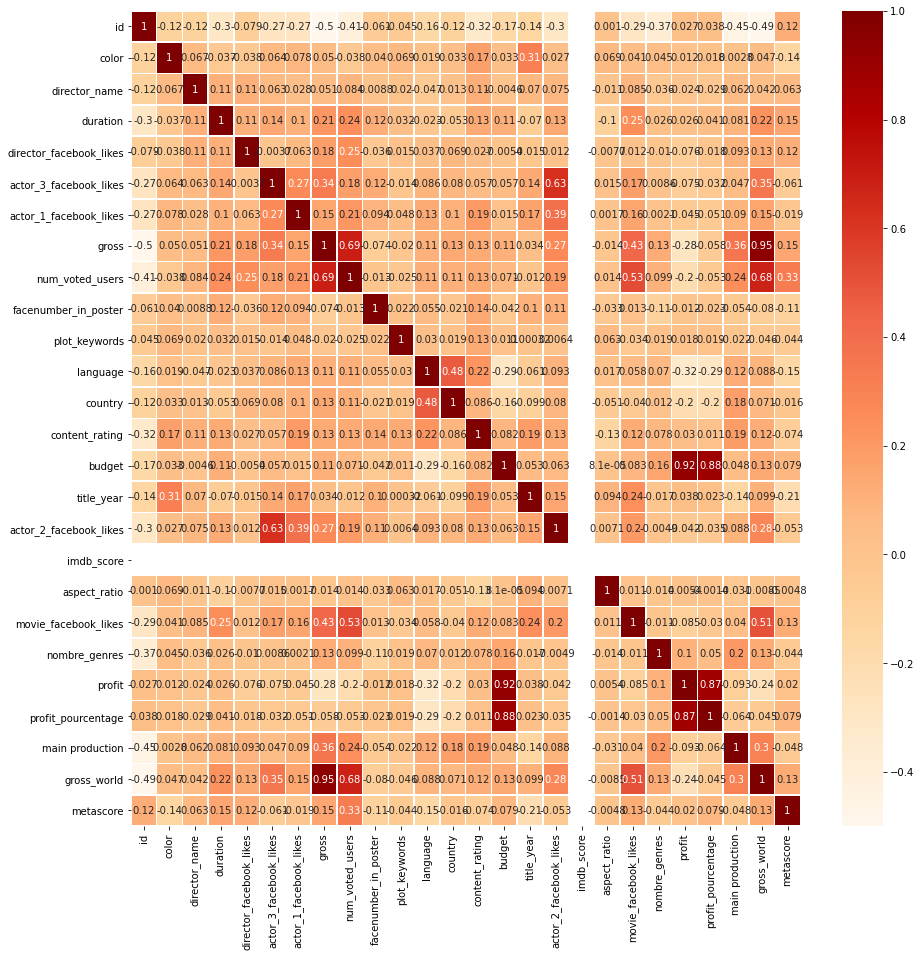

In [20]:
correlations = movies.corr()
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, annot=True, cmap="OrRd", linewidths=.5)

In [21]:
movies=movies.join(df.genres.str.get_dummies("|"))
movies=movies.fillna(0)
movies=movies.drop(columns=['genres','genres_first','movie_title','actor_1_name','actor_2_name','actor_3_name','profit','profit_pourcentage','gross'])

In [22]:
#correlations = movies.corr()
#f,ax = plt.subplots(figsize=(15,15))
#sns.heatmap(correlations, annot=True, cmap="OrRd", linewidths=.5)

In [23]:
x=movies.isna().sum()
y=movies.isna().sum()*100/len(df)
result = pd.concat([x, y], axis=1)
result.columns=["nombre de données manquantes","pourcentage de données manquantes"]
result

,nombre de données manquantes,pourcentage de données manquantes
id,0,0.0
color,0,0.0
director_name,0,0.0
duration,0,0.0
director_facebook_likes,0,0.0
actor_3_facebook_likes,0,0.0
actor_1_facebook_likes,0,0.0
num_voted_users,0,0.0
facenumber_in_poster,0,0.0
plot_keywords,0,0.0


In [24]:
movies.to_csv(r'test_file_prediction.csv',index=None,sep=';')

In [25]:
#reseau de neuronnes 
#mlp keras
